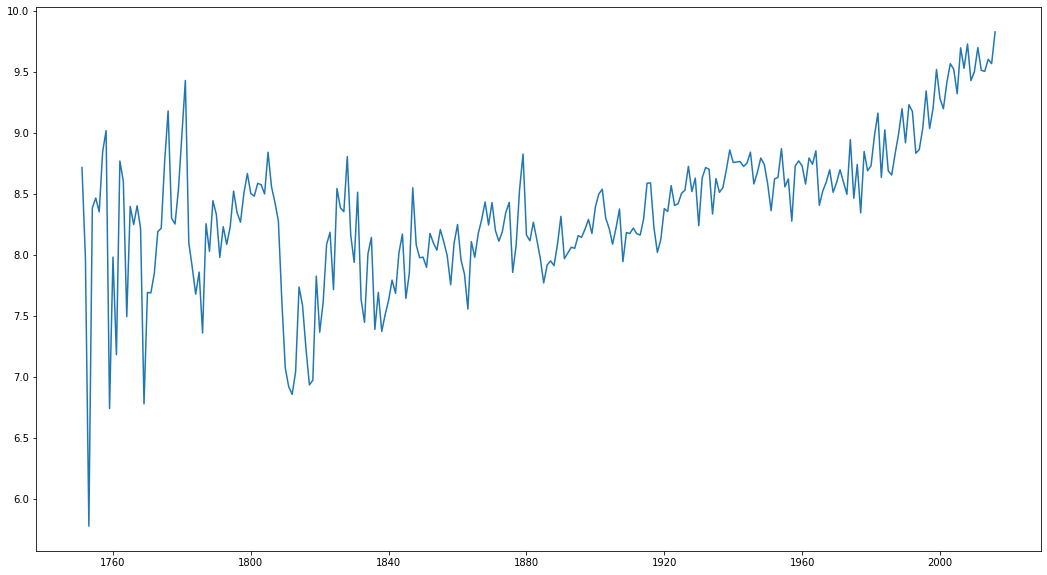

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO


# Temperatures
url ="https://raw.githubusercontent.com/Selimmmm/spe1/fff081c86c6c17ae30b96f0f250f2c90cabfd09c/projets/projet_III/data/GlobalTemperatures.csv"
response = requests.get(url)
s = str(response.content, 'utf-8')
data = StringIO(s)
temperatures = pd.read_csv(data)

temperatures.index = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures = temperatures.drop(columns=['dt'])
temperatures['Year'] = temperatures.index.year

# Moyennes annuelles
yearly_data = temperatures['LandAverageTemperature'].asfreq('Y')
yearly_mean = yearly_data.resample('Y').mean()

df = temperatures.resample('Y').mean()

# Rename
df = df[["LandAverageTemperature"]]
df.columns = ["temp"]

# Extract year
df["date"] = df.index
df["year"] = df["date"].dt.year


plt.figure(figsize=(18,10))
plt.plot(df['temp'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


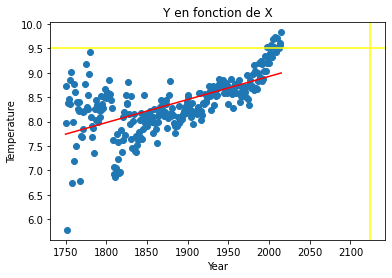

In [12]:
from sklearn.linear_model import LinearRegression


X = df[["year"]] # DataFrame because X[["year"]] and not X["year"]
Y = df["temp"]

# On crée une instance de modèle AVEC UN INTERCEPT
lr = LinearRegression(fit_intercept=True)

lr.fit(X,Y)
predictions = lr.predict(X)

plt.scatter(X.year, Y)
plt.title("Y en fonction de X")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.plot(X.year, predictions, color="red")


x = 2124
prediction = lr.predict([[x]])
# Where is the prediction ?
plt.axvline(x, color="yellow")
plt.axhline(prediction, color="yellow")

plt.show()

In [13]:
df

,temp,date,year
dt,,,
1750-12-31,8.719364,1750-12-31,1750
1751-12-31,7.976143,1751-12-31,1751
1752-12-31,5.779833,1752-12-31,1752
1753-12-31,8.388083,1753-12-31,1753
1754-12-31,8.469333,1754-12-31,1754
...,...,...,...
2011-12-31,9.516000,2011-12-31,2011
2012-12-31,9.507333,2012-12-31,2012
2013-12-31,9.606500,2013-12-31,2013
